<a href="https://colab.research.google.com/github/sakshiharde/Cognifyz_Internship/blob/main/Level__3_Cognifyz_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Level 3

In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
#Loading  the dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
res_data=pd.read_csv('/content/drive/MyDrive/content/Dataset .csv')

# Task 1- Predictive Modelling

In [ ]:
#New column for restaurant name length
res_data['restaurant_name_length']=res_data['Restaurant Name'].str.len()
res_data['restaurant_name_length']

0       16
1       16
2       22
3        4
4       11
        ..
9546    11
9547    12
9548     5
9549    11
9550    24
Name: restaurant_name_length, Length: 9551, dtype: int64

In [ ]:
#New columns for address feature

res_data['address_length']=res_data['Address'].str.len()
res_data['address_word_count']=res_data['Address'].str.split().str.len()
res_data['address_digit_count']=res_data['Address'].str.extract('(\d+)').sum(axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder
#Encoding table booking column
label=LabelEncoder()
res_data['Has_Table_Booking_Encoded']=label.fit_transform(res_data['Has Table booking'])
#Encoding Has online delivery column
res_data['Has_Online_Delivery_Encoded']=label.fit_transform(res_data['Has Online delivery'])

In [ ]:
pd.get_dummies(res_data,columns=['Has Table booking','Has Online delivery'],prefix="",drop_first=True)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Rating text,Votes,restaurant_name_length,address_length,address_word_count,address_digit_count,Has_Table_Booking_Encoded,Has_Online_Delivery_Encoded,_Yes,_Yes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Excellent,314,16,71,10,0,1,0,True,False
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Excellent,591,16,67,10,2277,1,0,True,False
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Very Good,270,22,56,8,1,1,0,True,False
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Excellent,365,4,70,10,0,0,0,False,False
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Excellent,229,11,64,9,0,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Very Good,788,11,103,13,۱,0,0,False,False
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Very Good,1034,12,77,9,85,0,0,False,False
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Good,661,5,73,9,56,0,0,False,False
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Very Good,901,11,75,9,64,0,0,False,False


In the above code , the original "Has Online Delivery" and " Has Table Booking" column has value like "Yes" and "No". After encoding ,it transformed into new column with just 0s and 1s.


*   1: Represents a restaurant that offers table booking and online delivery (originally "Yes")
*   0: Represents a restaurant that doesn't offer table booking and online delivery(originally "No")



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#split the data
X_train,X_test,y_train,y_test=train_test_split(res_data[['restaurant_name_length','address_length','address_word_count','address_digit_count','Has_Table_Booking_Encoded','Has_Online_Delivery_Encoded']],res_data['Aggregate rating'],test_size=0.2,random_state=42)

#create and train the model
model=LinearRegression()
model.fit(X_train,y_train)

#make predictions
y_pred=model.predict(X_test)
y_pred

array([2.28007819, 3.06991475, 2.24579297, ..., 2.33285062, 2.43035288,
       2.2326372 ])

In [ ]:
from sklearn.metrics import mean_squared_error
#Evaluate the model
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 2.072479196620725


In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)

R2 Score: 0.08946399076481437


In [ ]:
from sklearn.metrics import mean_absolute_error
mean=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mean)

Mean Absolute Error: 1.1882065988250283


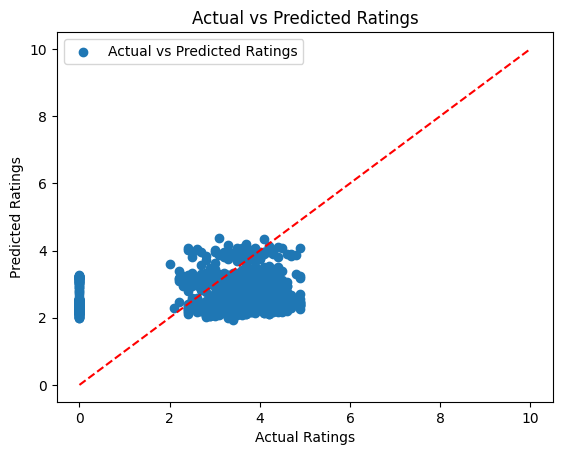

In [ ]:
# We have predited ratings (y_pred) and actual ratings (y_test)

#Scatter plot
plt.scatter(y_test,y_pred)
#Add Labels and title
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')

#Add a diagonal line for perfect prediction
plt.plot([0,10],[0,10],color='red',linestyle='--')

#Add a legend
plt.legend(['Actual vs Predicted Ratings'])

plt.show()

In above Actual vs Predicted rating pattern in the scatter plot : The points are randomly scattered around the diagonal line which indicate that there is no bias in the model's prdictions and most of points fall below the diagonal line, the model tends to underpredict ratings. This means that model is performing well across the range of actual ratings and consistently predicting lower ratings than the actual ratings.

# Task 3- Data Visualization

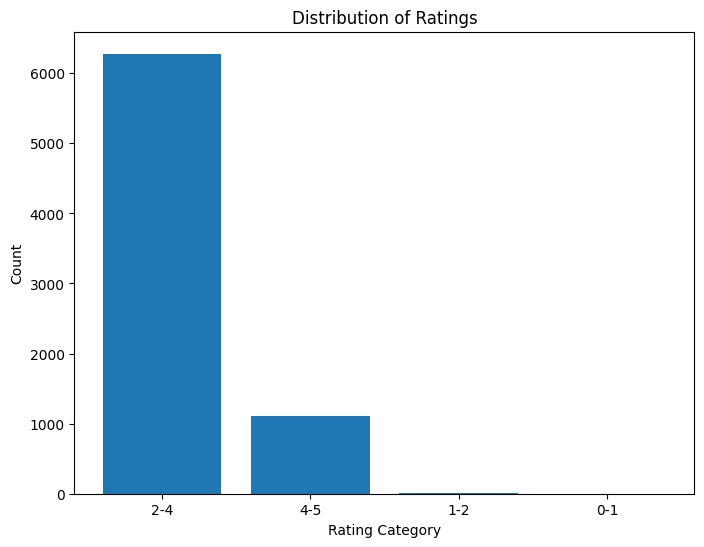

In [ ]:
#Let's create the visualization to represent the distribution of ratings using bar chart
bins=[0,1,2,4,5]
category_bins=['0-1','1-2','2-4','4-5']
res_data['rating_category']=pd.cut(res_data['Aggregate rating'],bins=bins,labels=category_bins)
rating_counts=res_data['rating_category'].value_counts()

#Creating the bar plot
plt.figure(figsize=(8,6))
plt.bar(rating_counts.index,rating_counts.values)
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


The graph depicts the distribution of ratings for a dataset , likely customer ratings of restaurants. The x-axis segment labeled "Rating Category" shows five categories:


*   0-1
*   1-2


*   2-4
*   4-5
The y-axis labeled "Count" represents the frequency or number of ratings that fall within each category.
The most frequent rating category appears to be"2-4",which indicates that a significant portion of ratings are average.










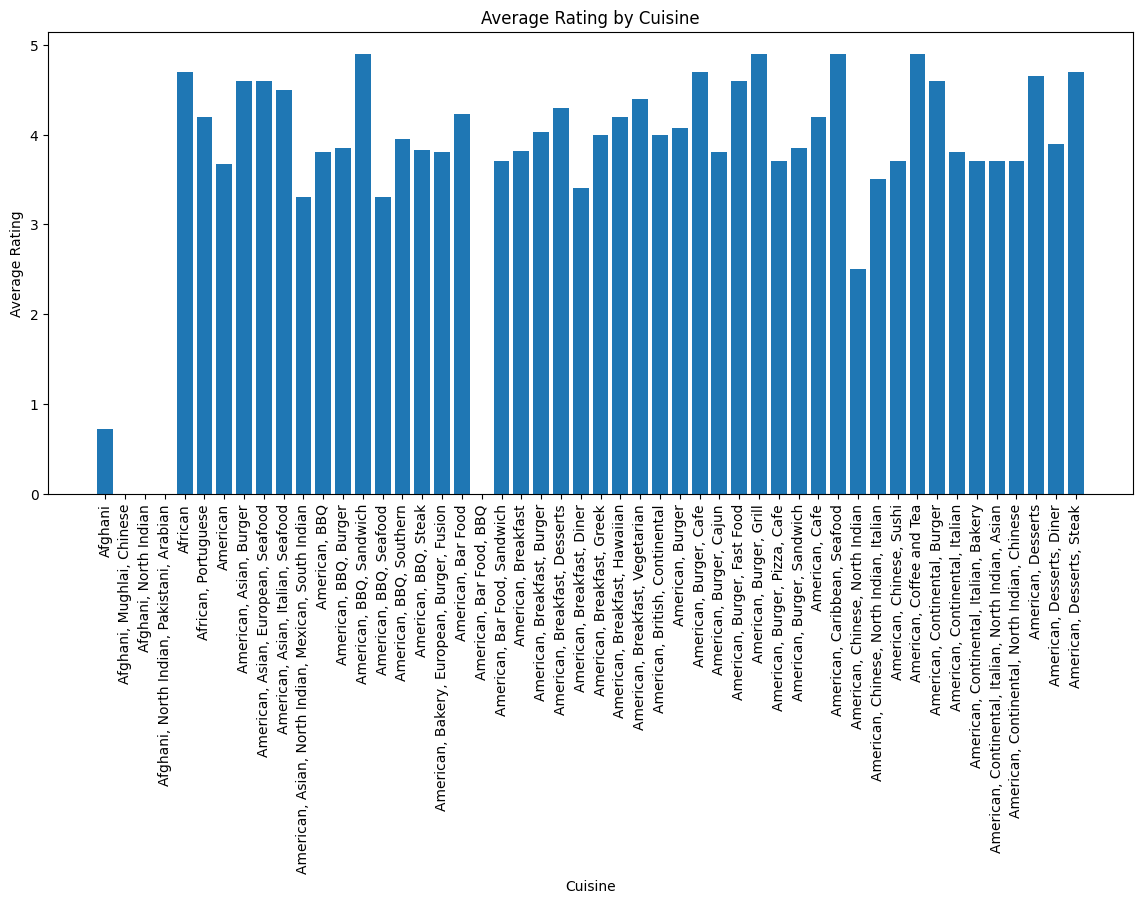

In [ ]:
#Let's compare the average ratings of different cuisines or cities
comparing_res_data=res_data[['Restaurant Name','Cuisines','City','Aggregate rating']]

#Grouping the data by cuisine and calculate the average rating
avg_rating_cuisine=res_data.groupby('Cuisines')['Aggregate rating'].mean().head(50)


#Creating a bar chart
plt.figure(figsize=(14,6))
plt.bar(avg_rating_cuisine.index,avg_rating_cuisine.values)
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cuisine')
plt.xticks(rotation=90)
plt.show()

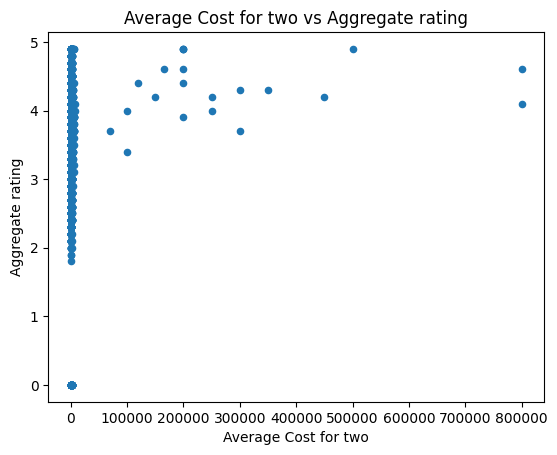

In [ ]:
#Visualize the relationship between average cost for two and aggregate ratings
res_data.plot.scatter(x='Average Cost for two',y='Aggregate rating')
plt.xlabel('Average Cost for two')
plt.ylabel('Aggregate rating')
plt.title('Average Cost for two vs Aggregate rating')
plt.show()

The above scatter plot to explore the relationship between how much it costs to dine at a restaurants(in the "Average Cost for Two" column) and its overall rating.
A scatter plot shows each restaurant as a dot on a graph, with the X-axis representing the average cost and Y-axis representing the rating.By looking at the distribution of the dots, we can see if there's a trend for more expensive restaurants tends to have a higher ratings